# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('data.csv')
except:
    print('No Data')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()
    
# or:
# temp = data.groupby('income_type')['total_income'].median()
# for d in data['income_type'].unique():
#     data.loc[(data['income_type'] == d) & (data['total_income'].isna()), 'total_income'] = temp[d]

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Сгруппируем данные по категории  `children` и подготовим субданные по столбцу `debt` в виде общего количества обращений и количества просроченных кредитов. Для подсчёта  количества просроченных кредитов применим обычное суммирование т.к. данные столбца `debt` принимают значения либо $0$ для вовремя возвращенных кредитов либо $1$ для просроченных

In [22]:
data_grouped_by_baby = data.groupby('children').agg({'debt': ['count', 'sum']})

Далее просто подсчитаем процентное соотношение. Поскольку здесь возникает опасная возможность деления на ноль (в *jupyter notebook* разное случается...) применим конструкцию **try - except**

In [23]:
try:
    debt_percentage_by_baby = data_grouped_by_baby['debt']['sum'] / data_grouped_by_baby['debt']['count']
except:
    print('Что-то поделилось на ноль')
else:
    print('Проехали...')
finally:
    print('Идем дальше')

Проехали...
Идем дальше


Поскольку табличная библиотека сходу не нашлась, сделаем вывод подручными способами

In [24]:
print('\n\033[1m'+'Процент задолженных кредитов домохозяйств\n    в зависимости от количества детей\n'+'\033[0m')
print('\033[1m'+'Количество детей  Процент \"просрочки\"'+'\033[0m')

for i in debt_percentage_by_baby.index:
    print(f'        {i}                {debt_percentage_by_baby[i]:.1%}')


Процент задолженных кредитов домохозяйств
    в зависимости от количества детей

Количество детей  Процент "просрочки"
        0                7.5%
        1                9.2%
        2                9.5%
        3                8.2%
        4                9.8%
        5                0.0%


Или так:

In [25]:
children = pd.DataFrame(debt_percentage_by_baby)
children.columns = ['Процент "просрочки"']
children

,"Процент ""просрочки"""
children,
0,0.075438
1,0.092346
2,0.094542
3,0.081818
4,0.097561
5,0.000000


Тут сразу отмечаем непонятные скачки процентных значений *\"просрочки\"* в нижней части "таблицы"

Для лучшей наглядности представим результат в графическом виде. Для этого импортируем необходимые библиотеки, а именно `seaborn` и `matplotlib.pyplot` как популярную визуализацию пакета `matplotlib`

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

Построим график зависимости между количеством детей в домохозяйстве и возвратом кредита в срок

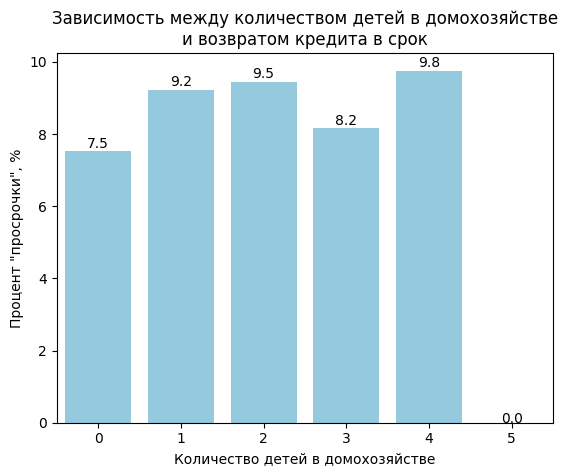

In [27]:
import numpy as np

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")
                
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


ax_baby = sns.barplot(x=debt_percentage_by_baby.index,\
                      y=debt_percentage_by_baby*100,\
                      color='skyblue')

show_values(ax_baby, orient="v")

ax_baby.set(xlabel='Количество детей в домохозяйстве',\
            ylabel='Процент \"просрочки\", %',\
            title='Зависимость между количеством детей в домохозяйстве\nи возвратом кредита в срок')
plt.show(ax_baby)

График наглядно показывает аномальное поведение *\"просрочки\"* на уровнях *\"детей\"* выше 3-х. Можно догадаться, что домохозяйства уже имеющие 4-х детей вряд ли будут принципиально отличаться от таковых с 5-ю. Логично предположить (что так и есть, если заглянуть внутрь `data_grouped_by_baby['debt']['count']`) что домохозяйства, обращающиеся за кредитом и имеющие 4-х и более детей достаточно редки и могут быть представлены статистически недостаточным количеством данных. Следующее действие - дать количественную оценку понятию "статистически недостаточное количество данных". Для этого сделаем небольшой экскурс в статистику достоверности выборки.

Оценить достоверность выборки можно рассчитав её Ошибку (Дельту). Чтобы не усложнять и перегружать конкретно *этот* проект вычислениями рассчитаем Дельту например по формуле $\Delta=Z\sqrt[]{\frac{pq}{n}}$. Здесь
- $n$ – объем выборки,
- $Z$ – коэффициент, зависящий от выбранного исследователем доверительного уровня,
- $p$ – доля респондентов с наличием исследуемого признака,
- $q = 1 – p$ – доля респондентов, у которых исследуемый признак отсутствует,
- $\Delta$ – предельная ошибка выборки.

В большинстве не *Business Critical* случаев берется доверительный уровень равный 95%. В этом случае коэффициент $Z$ равен $1.96$. Значения $p$ и $q$ считаем заранее неизвестными (чтобы не возиться с ненужными для *данного* учебного проекта дополнительными вычислениями) и примем за $0.5$, что дает возможность оценить Дельту "сверху". Также, как и в большинстве оценок, считаем пороговым значением Дельты: $\Delta=4\%$.

В таких предположениях вся математика сводится к простому выражению: $\Delta_s=1.96\sqrt[]{\frac{0.25}{n_s}}$, где:
- $\Delta_s$ - интересующая нас Дельта для выборки
- $n_s$ - объём этой выборки

Для того, чтобы вычислять квадратные корни из чисел потребуется импортировать библиотеку `math`. В этой библиотеке квадратный корень берётся простой функцией `sqrt()`

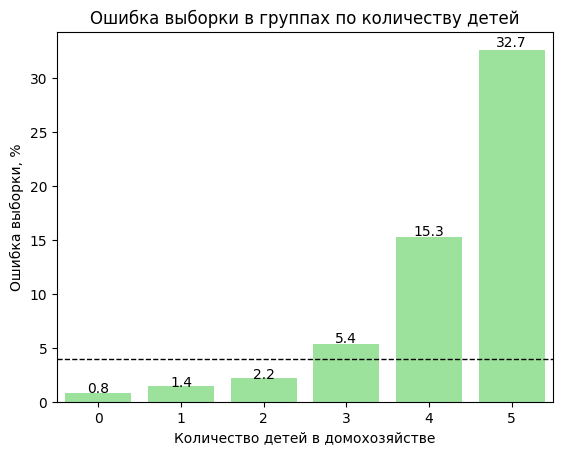

In [28]:
import math

baby_tmp = pd.Series(data_grouped_by_baby['debt']['count'])

try:
    for i in range(len(baby_tmp)):
        baby_tmp.loc[i] = 100 * 1.96 * math.sqrt(0.5 * 0.5 / baby_tmp.loc[i])
except:
    print('Что-то поделилось на ноль')

ax_baby_delta = sns.barplot(x=baby_tmp.index,\
                            y=baby_tmp,\
                            color='lightgreen')

plt.axhline(y=4, color='black', linestyle='dashed', linewidth=1)
show_values(ax_baby_delta)

ax_baby_delta.set(xlabel='Количество детей в домохозяйстве',\
                  ylabel='Ошибка выборки, %',\
                  title='Ошибка выборки в группах по количеству детей')
plt.show(ax_baby_delta)

Вспомним, что мы приняли пороговым значением Ошибки выборки: $\Delta=4\%$ (пунктирная линия на графике). Поскольку это максимальное из возможных расчётное значение, а домохозяйства с 3-мя детьми вовсе не редкость и находятся на грани достоверности, возьмём и их в анализ, однако таковые домохозяйства с 4-мя и более детьми должны быть исключены из рассмотрения ввиду недостоверности их выборок.

**Вывод:** 

<div class="alert alert-info">Анализ достоверности выборок для количества детей 4 и 5 показывает их непригодность для анализа. Минимумом количества записей является примерно 500-600, в данном случае такой минимум является обязательным условием.

Выборка для трехдетных домохозяйств находится на грани достоверности и для этой категории лучше получить дополнительный набор данных до порога в около 500-600 записей.

С учетом вышеприведенных ограничений и графика <i>"Зависимость между количеством детей в домохозяйстве и возвратом кредита в срок"</i> можно, с определённой долей осторожности, утверждать, что домохозяйства в данной категории <i>"количество детей"</i> распределяются по финансовой дисциплине в прядке ухудшения следующим образом:
    
- Количество детей: 0
- Количество детей: 3<sup>*</sup>
- Количество детей: 1
- Количество детей: 2

<sup>*</sup> Тем не менее, второе место группы из 3-х детей выглядит в списке несколько негармонично, должно быть подтверждено более объёмной выборкой по категории и на данный момент предполагается не включать в итоговые выводы.
Childfree forever!</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Сгруппируем данные по категории  `family_status` и подготовим субданные по столбцу `debt` в виде общего количества обращений и количества просроченных кредитов. Для подсчёта количества просроченных кредитов применим обычное суммирование т.к. данные столбца `debt` принимают значения либо $0$ для вовремя возвращенных кредитов либо $1$ для просроченных

In [29]:
data_grouped_by_famstat = data.groupby('family_status').agg({'debt': ['count', 'sum']})

Далее просто подсчитаем процентное соотношение. Та же конструкция **try - except**

In [30]:
try:
    debt_percentage_by_famstat = data_grouped_by_famstat['debt']['sum'] / data_grouped_by_famstat['debt']['count']
except:
    print('Что-то поделилось на ноль')
else:
    print('Проехали...')
finally:
    print('Идем дальше')

Проехали...
Идем дальше


Вывод "табличного" результата

In [31]:
print('\n\033[1m'+'  Процент задолженных кредитов домохозяйств\n      в зависимости от семейного статуса\n'+'\033[0m')
print('\033[1m'+'Процент \"просрочки\"         Семейный статус'+'\033[0m')

for i in debt_percentage_by_famstat.sort_values(ascending=False).index:
    print(f'       {debt_percentage_by_famstat.sort_values(ascending=False)[i]:.1%}\t\t    {i}')


  Процент задолженных кредитов домохозяйств
      в зависимости от семейного статуса

Процент "просрочки"         Семейный статус
       9.8%		    Не женат / не замужем
       9.3%		    гражданский брак
       7.6%		    женат / замужем
       7.1%		    в разводе
       6.6%		    вдовец / вдова


Визуализация. Построим график зависимости между семейным статусом домохозяйства и возвратом кредита в срок

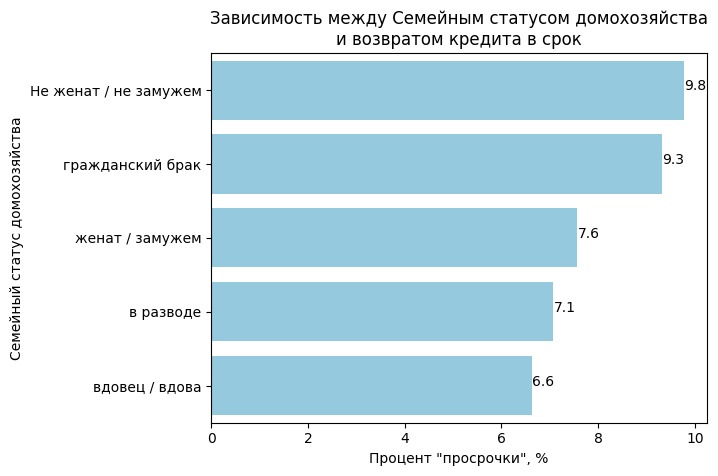

In [32]:
ax_by_famstat = sns.barplot(x=debt_percentage_by_famstat.sort_values(ascending=False)*100,\
                            y=debt_percentage_by_famstat.sort_values(ascending=False).index,\
                            color='skyblue')

show_values(ax_by_famstat, orient="h")

ax_by_famstat.set(xlabel='Процент \"просрочки\", %',\
                  ylabel='Семейный статус домохозяйства', \
                  title='Зависимость между Семейным статусом домохозяйства\nи возвратом кредита в срок')
plt.show(ax_by_famstat)

Результат распределён по категориям достаточно равномерно, но, на всякий случай, посмотрим достоверности категорий

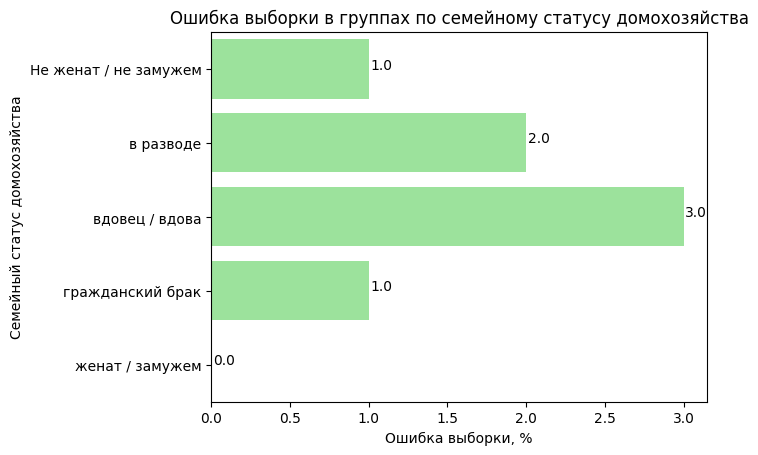

In [33]:
famstat_tmp = pd.Series(data_grouped_by_famstat['debt']['count'])

try:
    for i in range(len(famstat_tmp)):
        famstat_tmp[i] = 100 * 1.96 * math.sqrt(0.5 * 0.5 / famstat_tmp[i])
except:
    print('Что-то поделилось на ноль')

ax_famstat_delta = sns.barplot(x=famstat_tmp,\
                               y=famstat_tmp.index,\
                               color='lightgreen')

show_values(ax_famstat_delta, orient="h")

ax_famstat_delta.set(xlabel='Ошибка выборки, %',\
                     ylabel='Семейный статус домохозяйства',\
                     title='Ошибка выборки в группах по cемейному статусу домохозяйства')
plt.show(ax_famstat_delta)

Все достоверности находятся ниже порогового значения Ошибки выборки $\Delta=4\%$. Можно приступать к выводам по всем выборкам

**Вывод:** 

<div class="alert alert-info">Исходя из визуального анализа графика <i>"Зависимость между Семейным статусом домохозяйства и возвратом кредита в срок"</i> очевидным образом можно прийти к выводу о том, что люди находящиеся/бывавшие в браке являются более надежными заемщиками. Тем не менее, наиболее кредитоспособной категорией в этом исследовании оказалась <i>"вдовец / вдова"</i>

Распределение категорий в порядке убывания финансовой дисциплины:
- Вдовец / вдова
- В разводе
- Женат / замужем
- Гражданский брак
- Не женат / не замужем</div>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Сгруппируем данные по категории `total_income_category` и подготовим субданные по столбцу `debt` в виде общего количества обращений и количества просроченных кредитов. Для подсчёта количества просроченных кредитов применим обычное суммирование т.к. данные столбца `debt` принимают значения либо $0$ для вовремя возвращенных кредитов либо $1$ для просроченных

In [34]:
data_grouped_by_income = data.groupby('total_income_category').agg({'debt': ['count', 'sum']})

Далее просто подсчитаем процентное соотношение. Таже конструкция **try - except**

In [35]:
try:
    debt_percentage_by_income = data_grouped_by_income['debt']['sum'] / data_grouped_by_income['debt']['count']
except:
    print('Что-то поделилось на ноль')
else:
    print('Проехали...')
finally:
    print('Идем дальше')

Проехали...
Идем дальше


Вывод "табличного" результата

In [36]:
print('\n\033[1m'+'  Процент задолженных кредитов домохозяйств\n      в зависимости от уровня дохода\n'+'\033[0m')
print('\033[1m'+'Уровень дохода         Процент \"просрочки\"'+'\033[0m')

for i in debt_percentage_by_income.index:
    print(f'       {i}\t\t      {debt_percentage_by_income[i]:.1%}')


  Процент задолженных кредитов домохозяйств
      в зависимости от уровня дохода

Уровень дохода         Процент "просрочки"
       A		      8.0%
       B		      7.1%
       C		      8.5%
       D		      6.0%
       E		      9.1%


Как и в предыдущем исследовании результат распределён по категориям достаточно равномерно, тем не менее, не совсем логично с точки зрения "здравого смысла". Например, наиболее обеспеченная категория `'A'` по какой-то причине не склонна погашать кредиты более своевременно по сравнению со совей предшественницей. *\"Я психолог... о вот наука!\"*, но лучше посмотреть достоверности категорий. Однако визуализируем сперва результаты *\"Зависимости между уровнем дохода домохозяйства и возвратом кредита в срок\"*.

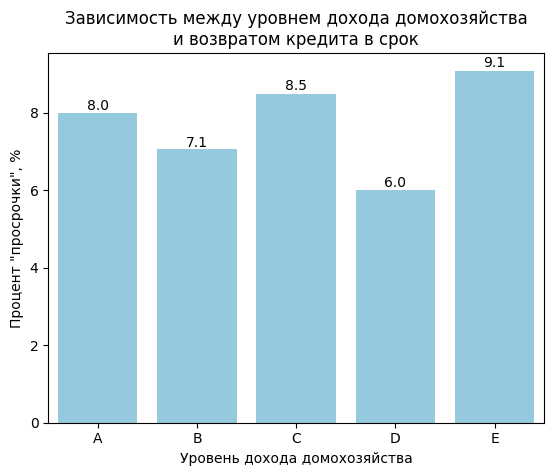

In [37]:
ax_by_income = sns.barplot(x=debt_percentage_by_income.index,\
                           y=debt_percentage_by_income*100,\
                           color='skyblue')

show_values(ax_by_income, orient="v")

ax_by_income.set(xlabel='Уровень дохода домохозяйства',\
                 ylabel='Процент \"просрочки\", %',\
                 title='Зависимость между уровнем дохода домохозяйства\nи возвратом кредита в срок')
plt.show(ax_by_income)

Достоверности категорий

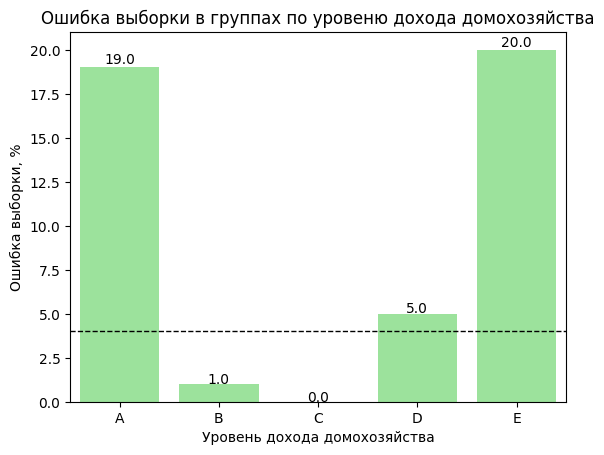

In [38]:
income_tmp = pd.Series(data_grouped_by_income['debt']['count'])

try:
    for i in range(len(income_tmp)):
        income_tmp[i] = 100 * 1.96 * math.sqrt(0.5 * 0.5 / income_tmp[i])
except:
    print('Что-то поделилось на ноль')
    
ax_income_delta = sns.barplot(x=income_tmp.index,\
                              y=income_tmp,\
                              color='lightgreen')

plt.axhline(y=4, color='black', linestyle='dashed', linewidth=1)
show_values(ax_income_delta)

ax_income_delta.set(xlabel='Уровень дохода домохозяйства',\
                    ylabel='Ошибка выборки, %',\
                    title='Ошибка выборки в группах по уровеню дохода домохозяйства')
plt.show(ax_income_delta)

А вот и "психология". Категория `'A'`, как впрочем и `'E'` содержит недостаточно дынных (пунктирная линия - $\Delta=4\%$). Объяснение найдется всему. В данном случае очевидно, что самые малообеспеченные и высокообеспеченные категории домохозяйств не склонны брать перечисленные в исходных данных категории кредитов. `'А'` и `'E'` из анализа исключаем. Категория `'D'` на грани достоверности. Отметим этот факт.

**Вывод:** 

<div class="alert alert-info"> 
Анализ достоверности доступных выборок погашения кредита в срок по категориям уровней дохода домохозяйства показывает недостаточность данных для категорий:
    
- 'A': 1,000,001 и выше 
    
- 'E': 0–30,000
    
Минимумом количества записей в выборке для анализа по-прежнему  считаем число около 500-600. На данный момент выводы относительно этих категорий сделать не представляется правдоподобным.

Категория 'D' (30,001–50,000) находится на грани достоверности  и для её достоверного анализа нужно увеличить количество записей в категории 'D' примерно до 500-600. 

С учетом вышеприведенных ограничений и графика <i>"Зависимость между уровнем дохода домохозяйства и возвратом кредита в срок"</i> можно, с определённой долей осторожности, утверждать, что в порядке уменьшения финансовой дисциплины категории <i>"уровня дохода"</i> распределяются так (т.е. чем больше у человека денег, тем легче ему обслуживать долг по кредиту):

- 'D' (30,001–50,000)<sup>*</sup>
- 'B' (200,001–1,000,000)
- 'C' (50,001–200,000) 

<sup>*</sup> Тем не менее, лидирующее положение группы 'D' должно быть подтверждено более объёмной выборкой по категории, на данный момент находится под сомнением и предполагается не включать в итоговые выводы.</div>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Here we go again... Сгруппируем данные по категории `purpose_category` и подготовим субданные по столбцу `debt` в виде общего количества обращений и количества просроченных кредитов. Для подсчёта количества просроченных кредитов применим обычное суммирование т.к. данные столбца `debt` принимают значения либо $0$ для вовремя возвращенных кредитов либо $1$ для просроченных

In [39]:
data_grouped_by_purpose = data.groupby('purpose_category').agg({'debt': ['count', 'sum']})

Далее просто подсчитаем процентное соотношение. Таже конструкция **try - except**

In [40]:
try:
    debt_percentage_by_purpose = data_grouped_by_purpose['debt']['sum'] / data_grouped_by_purpose['debt']['count']
except:
    print('Что-то поделилось на ноль')
else:
    print('Проехали...')
finally:
    print('Идем дальше')

Проехали...
Идем дальше


Вывод "табличного" результата

In [41]:
print('\n\033[1m'+'  Процент задолженных кредитов домохозяйств\n      в зависимости от цели кредита\n'+'\033[0m')
print('\033[1m'+'Процент \"просрочки\"\tЦель кредита'+'\033[0m')

for i in debt_percentage_by_purpose.sort_values(ascending=False).index:
    print(f'\t{debt_percentage_by_purpose.sort_values(ascending=False)[i]:.1%}\t\t{i}')


  Процент задолженных кредитов домохозяйств
      в зависимости от цели кредита

Процент "просрочки"	Цель кредита
	9.3%		операции с автомобилем
	9.3%		получение образования
	7.9%		проведение свадьбы
	7.3%		операции с недвижимостью


Особых вопросов к результату пока нет. Визуализация. Построим график зависимости между целью кредита и возвратом кредита в срок

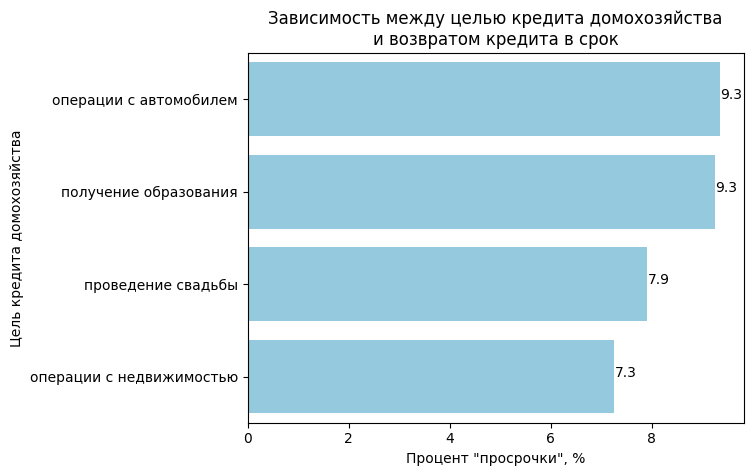

In [42]:
ax_by_purpose = sns.barplot(x=debt_percentage_by_purpose.sort_values(ascending=False)*100,\
                           y=debt_percentage_by_purpose.sort_values(ascending=False).index,\
                           color='skyblue')

show_values(ax_by_purpose, orient="h")

ax_by_purpose.set(xlabel='Процент \"просрочки\", %',\
                 ylabel='Цель кредита домохозяйства',\
                 title='Зависимость между целью кредита домохозяйства\nи возвратом кредита в срок')
plt.show(ax_by_purpose)

Результат распределён по категориям достаточно равномерно, но, на всякий случай, опять посмотрим достоверности категорий

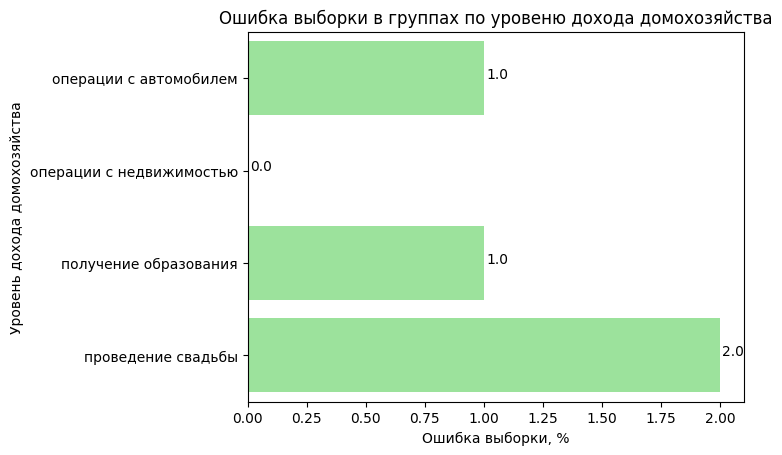

In [43]:
purpose_tmp = pd.Series(data_grouped_by_purpose['debt']['count'])

try:
    for i in range(len(purpose_tmp)):
        purpose_tmp[i] = 100 * 1.96 * math.sqrt(0.5 * 0.5 / purpose_tmp[i])
except:
    print('Что-то поделилось на ноль')

ax_purpose_delta = sns.barplot(x=purpose_tmp,\
                               y=purpose_tmp.index,\
                               color='lightgreen')

show_values(ax_purpose_delta, orient="h")

ax_purpose_delta.set(xlabel='Ошибка выборки, %',\
                     ylabel='Уровень дохода домохозяйства',\
                     title='Ошибка выборки в группах по уровеню дохода домохозяйства')
plt.show(ax_purpose_delta)

Все достоверности находятся ниже порогового значения Ошибки выборки $\Delta=4\%$. Можно приступать к выводам по всем выборкам

**Вывод:** 

<div class="alert alert-info">Исходя из визуального анализа графика <i>"Зависимость между целью кредита домохозяйства и возвратом кредита в срок"</i> можно прийти к выводу о том, что жить без автомобиля, образования и супруга/супруги вполне можно, а вот без квартиры совсем никак. Таким образом, наиболее кредитоспособной категорией в этом исследовании оказалась <i>"операции с недвижимостью"</i>

Распределение категорий в порядке убывания финансовой дисциплины:
- операции с недвижимостью
- проведение свадьбы
- получение образования
- операции с автомобилем</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Если речь идёт о пропусках в исходных данных данного проекта, то совершенно очевидно, что они сделаны намеренно в учебных целях. Простое сравнение количества строк с пропусками в `'days_employed'` и `'total_income'` по операторам `'&'` и `'|'` показыввет что абсолютно все строки с пропусками имеют пропуск и в `'days_employed'` и в `'total_income'`. Вероятность произойти такому событию случайно стремится к нулю. Таким образом это подготовленный материал или системная ошибка. Отсюда мы приходим к возможным причинам появления пропусков вообще — *неверный ввод, ошибки вычислений, ошибки баз данных, намеренное искажение данных и т.п.*

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Как известно, Медиана — это точное среднее значение набора данных. Математическим свойством медианы является то, что сумма абсолютных (по модулю) отклонений от медианного значения дает минимально возможное значение, если сравнивать с отклонениями от любой другой величины. Таким образом Медианой удобно описывать набор данных со значительным перекосом в данных или когда данные имеют длинный хвост. Медиана определяет вес данных, который обычно имеет большое значение для более длинных хвостов, а также на Медиану гораздо меньше влияют выбросы данных.


#### 3.7 [Дополнительно] Где-то в описании проектной работы также указывалась цель разобраться влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Ответим и на этот вопрос. Тем более это хороший повод наконец применить сводные таблицы, которые ранее никак не пригождались. Выведем процент кредитных задолженностей для перечисленных категорий. Для категории `'children'` сделаем вывод только для первых четырёх значений. Т.е. для количества детей 0 - 3. Значения количества детей 4 и 5 являются недостоверными в предоставленных данных в этом рассмотрении.

In [44]:
try:
    display(data.pivot_table(index='family_status',\
                 columns=data[data['children'] < 4]['children'],\
                 values='debt',\
                 aggfunc=lambda x : f'{x.sum() / x.count():.1%}'))
except:
    print('Что-то поделилось на ноль')

children,0.0,1.0,2.0,3.0
family_status,,,,
Не женат / не замужем,9.3%,11.6%,12.0%,12.5%
в разводе,7.0%,6.7%,8.6%,9.1%
вдовец / вдова,6.3%,9.1%,15.0%,0.0%
гражданский брак,8.4%,11.9%,8.7%,14.3%
женат / замужем,6.9%,8.3%,9.5%,6.8%


Также подсчитаем обшибки выборок для сводной таблицы выше. Будем использовать `numpy.sqrt()` вместо `math.sqrt()` из-за удобства работы с массивами и сериями:

In [45]:
try:
    display(data.pivot_table(index='family_status',\
                 columns=data[data['children'] < 4]['children'],\
                 values='debt',\
                 aggfunc=lambda x :\
                 f'{1.96 * np.sqrt(0.5 * 0.5 / x.count()):.1%}'))
except:
    print('Что-то поделилось на ноль')

children,0.0,1.0,2.0,3.0
family_status,,,,
Не женат / не замужем,2.1%,4.6%,11.3%,34.6%
в разводе,3.5%,5.5%,10.9%,29.5%
вдовец / вдова,3.4%,11.2%,21.9%,40.0%
гражданский брак,1.9%,3.1%,5.3%,13.1%
женат / замужем,1.1%,1.8%,2.5%,6.2%


### Шаг 4: общий вывод.

<div class="alert alert-info">
<b>Цель исследования</b><br>
Итак, целью настоящего исследования являлось определение влияния семейного положения и количества детей клиента на факт погашения кредита в срок. Затем эта информация предоставляется в кредитный отдел банка для последующего  построения модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.<br><br>

<b>Исходные данные</b><br>
Таблица в формате Comma-Separated Values содержащая следующие позиции
- 'children' — количество детей в семье
- 'days_employed' — общий трудовой стаж в днях
- 'dob_years' — возраст клиента в годах
- 'education' — уровень образования клиента
- 'education_id' — идентификатор уровня образования
- 'family_status' — семейное положение
- 'family_status_id' — идентификатор семейного положения
- 'gender' — пол клиента
- 'income_type' — тип занятости
- 'debt' — имел ли задолженность по возврату кредитов
- 'total_income' — ежемесячный доход
- 'purpose' — цель получения кредита<br><br>

<b>Предварительная обработка данных</b><br>
Предварительная обработка данных выявила наличие пропусков в столбцах типа float64 - 'days_employed' и 'total_income'. Пропуски 'total_income' были заменены медианными значениями по каждому типу из столбца 'income_type'. Таким же образом были заменены пропуски в столбце 'days_employed

Кроме того, произведено исправление аномальных данных столбца количества детей в семье 'children' и аномальные значения столбца 'days_employed' для двух типов занятости - безработные и пенсионеры. Последние аномалии исправить сложно, и они оставлены без изменений.

Для удобства дальнейшей работы с данными была произведена категоризация общего дохода 'total_income' в 'total_income_category':
- 0–30,000 — 'E';
- 30,001–50,000 — 'D';
- 50,001–200,000 — 'C';
- 200,001–1,000,000 — 'B';
- 1,000,001 и выше — 'A'.

а также категоризация столбца назначения кредита 'purpose' в новый столбец 'purpose_category' содержащий следующие категории:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.<br><br>

<b>Исследование зависимостей</b><br>
Для исследования зависимости определим процент просроченных кредитов как отношение количества просроченных кредитов к общему количеству взятых и применим этот процент последовательно для всех пар зависимостей:
- зависимость между количеством детей и возвратом кредита в срок (пара 'children' - 'debt')
- зависимость между семейным положением и возвратом кредита в срок (пара 'family_status' - 'debt')
- зависимость между уровнем дохода и возвратом кредита в срок (пара 'total_income_category' - 'debt')
- зависимость возврата кредита в срок от цели этого кредита (пара 'purpose_category' - 'debt')
Вспомогательным инструментом при исследование вышеперечисленных зависимостей являлась оценки достоверности каждой выборки для каждой пары. Достоверность выборки характеризует вероятность того, что выборка окажется значимой для отобранных результатов и оценивается расчетом её ошибки $\Delta$.

Оценка достоверности выборок по критерию $\Delta \leq 4\%$ показала необходимость исключить из рассмотрения некоторые категории выборок из-за существенно высокой ошибки вследствии недостаточного объёма статистических данных.<br><br>

<b>Промежуточные выводы исследований по каждой паре данных</b><br>

<i>"Зависимость между количеством детей в домохозяйстве и возвратом кредита в срок"</i> распределяются по финансовой дисциплине в прядке ухудшения следующим образом:<br>
- Количество детей: 0
- Количество детей: 3<sup>*</sup>
- Количество детей: 1
- Количество детей: 2
    
<sup>*</sup>Предлагается не включать в последующие выводы.<br><br>

<i>"Зависимость между Семейным статусом домохозяйства и возвратом кредита в срок"</i>  в порядке убывания финансовой дисциплины:

- Вдовец / вдова
- В разводе
- Женат / замужем
- Гражданский брак
- Не женат / не замужем<br><br>

<i>"Зависимость между уровнем дохода домохозяйства и возвратом кредита в срок"</i> в порядке уменьшения финансовой дисциплины категории "уровня дохода" распределяются так:

- 'D' (30,001–50,000)<sup>*</sup>
- 'B' (200,001–1,000,000)
- 'C' (50,001–200,000)

<sup>*</sup>Предлагается не включать в последующие выводы.<br><br>

<i>"Зависимость между целью кредита домохозяйства и возвратом кредита в срок"</i>  в порядке убывания финансовой дисциплины:
- операции с недвижимостью
- проведение свадьбы
- получение образования
- операции с автомобилем<br><br>

<b>Общий вывод</b><br>
Для дальнейших исследований из предоставленных данных можно выделить ещё несколько пар данных, однако это задача может быть решена уже в продолжении к данному исследованию. На данный момент можно утверждать, что наиболее надежный заёмщик банка это <i>бездетная вдова/вдовец с уровнем дохода 200,001–1,000,000 и берущая кредит на операции с недвижимостью</i>.

В описании проектной работы также указывалась цель разобраться влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Ниже сводная таблица по требуемым категориям. Значения - процент непогашенных вовремя кредитов по категориям:
    
Количество детей          |0    |1    |2    |3
:-------------------------|:---:|:---:|:---:|:---:
**Семейное положение**    |     |     |     |
**Не женат / не замужем** |9.3% |11.6%|12.0%|12.5%
**В разводе**             |7.0% |6.7% |8.6% |9.1%
**Вдовец / вдова**        |6.3% |9.1% |15.0%|0.0%
**Гражданский брак**	  |8.4% |11.9%|8.7% |14.3%
**Женат / замужем**       |6.9% |8.3% |9.5% |6.8%
    
Обшибки выборок для сводной таблицы выше:
    
Количество детей          |0    |1    |2    |3
:-------------------------|:---:|:---:|:---:|:---:
**Семейное положение**    |     |     |     |
**Не женат / не замужем** |2.1% |4.6% |11.3%|34.6%
**В разводе**             |3.5% |5.5% |10.9%|29.5%
**Вдовец / вдова**        |3.4% |11.2%|21.9%|40.0%
**Гражданский брак**	  |1.9% |3.1% |5.3% |13.1%
**Женат / замужем**       |1.1% |1.8% |2.5% |6.2%
    
Данные для которых $\Delta>4\%$ необходимо либо исключить из рассмотрения при значительном превышении, либо относиться с осторожностью при пограничном значении.